<div >
<div style='width:120px; height:120px;float: left;margin-right:25%'>
    <img src='http://www.dot.uff.br/sites/all/themes/dot/logo.png' width="120px">
</div>
<div style='width:120px; height:120px;float: left;margin-right:25%'>
    <img src='https://logodownload.org/wp-content/uploads/2015/03/uff-logo-5.png' width="120px">    
</div>
<div style='width:120px; height:120px;float: left;'>
    <img src='http://gcr.sites.uff.br/wp-content/uploads/sites/221/2019/06/logo_giecar3_4_azul.png' width="120px">
</div>
</div>

<br><br><br><br><br><br><br><br>
<center><h1> - Curso de Machine Learning - </h1></center>
<h3>K-means, perceptron em dados de poços</h3>
<h3>Tópico 1: Aprendizado não supervisionado - k-means</h3>
<h3>palestrante: Mario Martins Ramos - mario_martins@id.uff.br</h3>
----------------------------------------------------------------------------------------------------------------------------------
<br>referências:
<br><b>k-means:</b>
<br><a href="https://scholar.google.co.in/citations?user=1jzAmyAAAAAJ&hl=en">Anuradha Bhatia</a>
<br><a href="https://www.youtube.com/watch?v=wt-X61BnUCA&t=150s">Anuradha Bhatia - vídeo</a>
<br><b>Perceptron:</b>
<br>Sebastian Raschka - Python Machine Learning (Livro)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def curvas(caminho):
    url = caminho

    cabecalho = ['PROF','GR', 'RHOB', 'NPHI']
    data_DP1 = pd.read_csv(url, usecols=(0,5,8,9), header=42, sep='\s+', names=cabecalho)

    #______________________________________________________________________________#
    # Remover valores nulos -999.000

    DP1 = data_DP1.loc[(data_DP1['GR'] != -999.00000) & 
                      (data_DP1['RHOB']  != -999.00000) &
                      (data_DP1['NPHI']  != -999.00000)]

    ##############################
    prof_DP1 = np.copy(DP1['PROF'])
    GR_DP1 = np.copy(DP1['GR'])
    RHOB_DP1 = np.copy(DP1['RHOB'])
    NPHI_DP1 = np.copy(DP1['NPHI'])
    ##############################

    #______________________________________________________________________________#

    ### calculando o VSH para as duas curvas:

    rho_ma = 2.65 # densidade da matriz
    rho_fl = 1.10 # densidade do fluído
    rho_sh = 2.70 # densidade do folhelho

    ##############################
    VSH_GR_DP1   = [] # argilosidade via perfil de raios gama
    VSH_ND_DP1   = [] # argilosidade via perfis NPHI e DPHI
    VSH_ND_DP1_0 = [] # argilosidade NPHI e DPHI normalizada
    ##############################
    min_GR_DP1 = min(GR_DP1) # valor mínimo da argilosidade no perfil de raios-gama (GR)
    max_GR_DP1 = max(GR_DP1) # valor máximo da argilosidade no perfil de raios-gama (GR)
    ##############################

    for i in range (len(prof_DP1)):
        IGR0 = (GR_DP1[i] - min_GR_DP1)/(max_GR_DP1 - min_GR_DP1) # Calculo da Argilosidade (basica, Schlumberger)
        
        vsh_gr = 0.083*((2**(3.70*IGR0))-1)        # Correcao de Larionov para Argilosidade
        VSH_GR_DP1.append(vsh_gr)

        #_____________________________________________________#

        phi_ed = ((((RHOB_DP1[i] - rho_ma)/(rho_fl - rho_ma)) - 
                     ((vsh_gr)*(rho_sh - rho_ma)/(rho_fl - rho_ma))))
        VSH_ND_DP1_0.append(NPHI_DP1[i] - phi_ed) # calculo da argilosidade pela diferenca entre NPHI e DPHI
        
    ##############################
    # n de normalizada
    
    min_GR_DP1_n = min(VSH_ND_DP1_0) 
    max_GR_DP1_n = max(VSH_ND_DP1_0)

    ##############################

    for i in range (len(prof_DP1)):
        VSH_ND_DP1.append((VSH_ND_DP1_0[i] - min_GR_DP1_n)/(max_GR_DP1_n - min_GR_DP1_n))

    #---------------------------------------------------------------------------------#
    ### Graficos

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4) # 4 cruvas = 4 subplots
    fig.set_size_inches(12, 11) # tamanho da figura | polegadas

    #_____________________________________________________#

    ax1.plot(GR_DP1,prof_DP1,'-g',linewidth = 1,label='GR')
    # (eixo x, eixo y, cor e tipo, comprimento da curva, legenda )
    ax1.invert_yaxis()
    # inverte o eixo y
    ax1.grid()
    # adiciona o 'grid' ou malha de fundo
    ax1.set_ylabel('profundidade ($m$)', fontsize=16)
    # o que vai ser escrito no eixo y
    ax1.set_title('GR', fontsize=16)
    # titulo do 'track' ou do grafico com tamanho de letra 16

    #_____________________________________________________#

    ax2.plot(RHOB_DP1,prof_DP1,'-b',linewidth = 1,label='RHOB')
    ax2.invert_yaxis()
    ax2.grid()
    ax2.set_yticklabels([]) # remove as profundidades do eixo y
    ax2.set_title('RHOB', fontsize=16)
    ax2.set_xlim(2,3)

    #_____________________________________________________#

    ax3.plot(NPHI_DP1,prof_DP1,'-k',linewidth = 1,label='NPHI')
    ax3.invert_yaxis()
    ax3.grid()
    ax3.set_yticklabels([])
    ax3.set_title('NPHI', fontsize=16)
    ax3.set_xlim(45,-15)

    #_____________________________________________________#

    ax4.plot(VSH_GR_DP1,prof_DP1,'-g',linewidth = 1,label='VSH_GR')
    ax4.plot(VSH_ND_DP1,prof_DP1,'-b',linewidth = 1,label='VSH_ND')
    ax4.invert_yaxis()
    ax4.grid()
    ax4.set_yticklabels([])
    ax4.set_title('VSH', fontsize=16)
    # adiciona a posicao da legenda
    ax4.legend(loc=2)

    plt.show()
    #---------------------------------------------------------------------------------#
    return (prof_DP1,VSH_GR_DP1,VSH_ND_DP1)

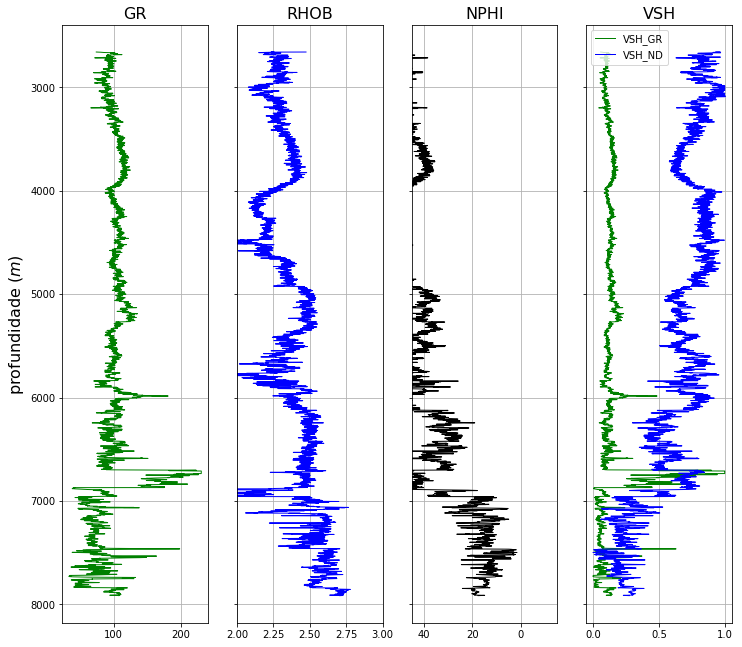

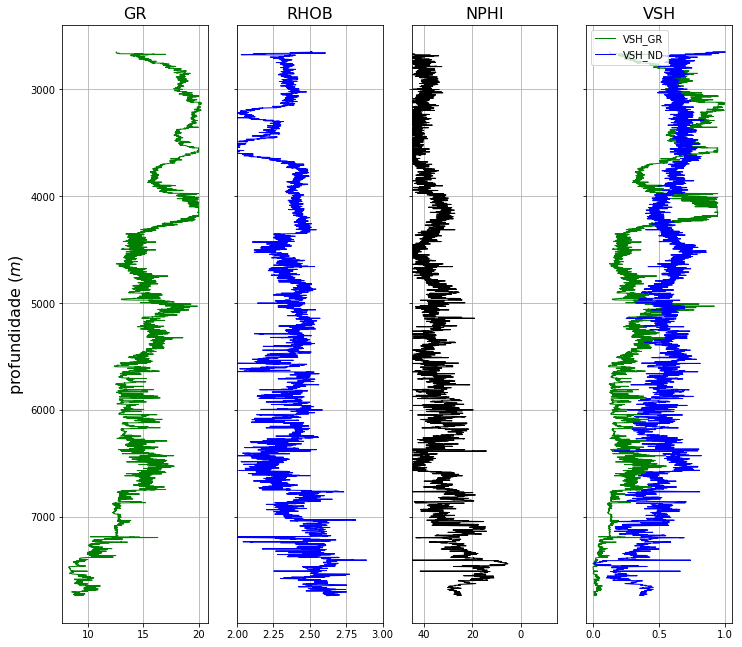

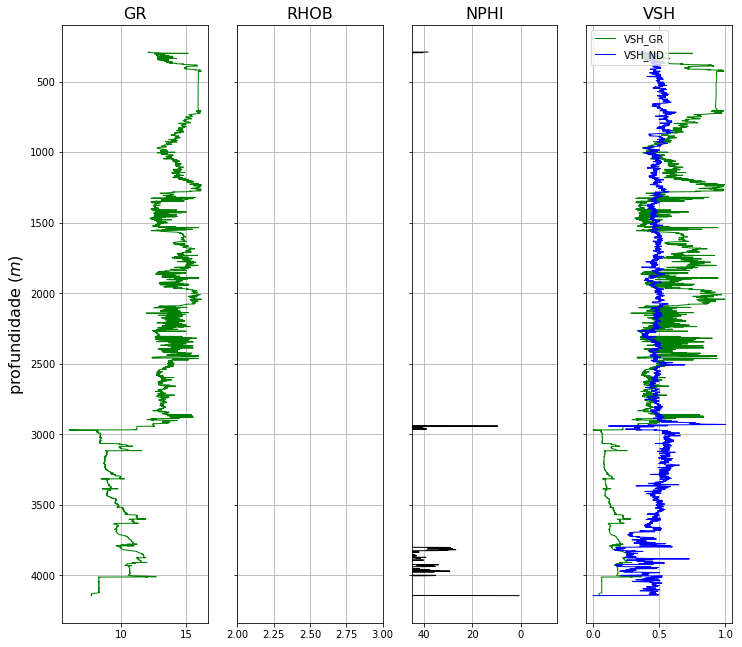

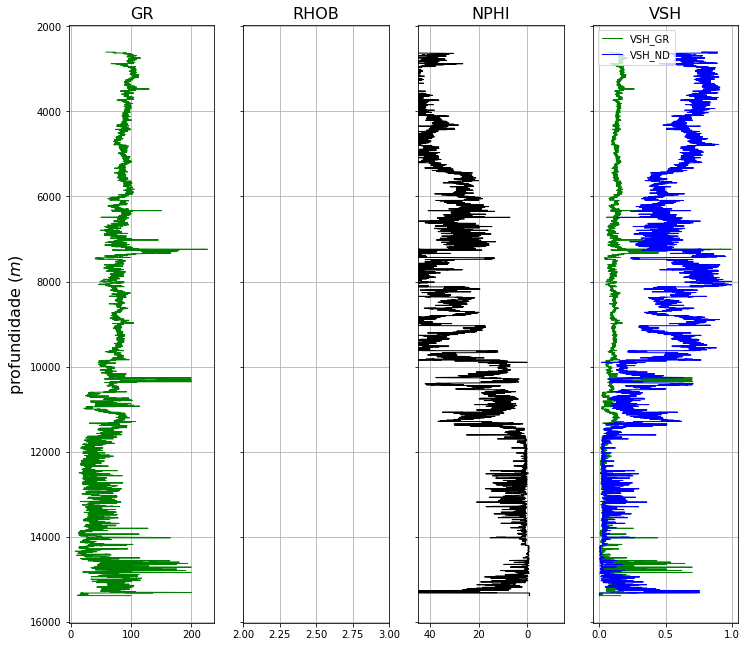

In [4]:
### Preparando os dados para o aprendizado de maquina:

data_DP1 = curvas('k-means e perceptron/Wells/DrewPt1/LAS/DP1.LAS')
data_ES1 = curvas('k-means e perceptron/Wells/ESimp1/LAS/ES1.LAS')
data_WD1 = curvas('k-means e perceptron/Wells/WDease1/LAS/WD1.LAS')
data_IK1 = curvas('k-means e perceptron/Wells/Ikpik1/LAS/IK1.LAS')

VSH_GR = data_DP1[1] + data_ES1[1] + data_IK1[1] + data_WD1[1] # transformando as curvas de VSH em uma so
VSH_ND = data_DP1[2] + data_ES1[2] + data_IK1[2] + data_WD1[2]

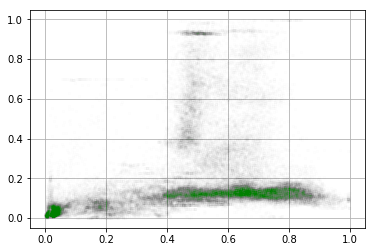

In [5]:
# Grafico de dispersao (Scatterplot)
plt.plot(VSH_ND,VSH_GR,'.g',alpha=0.005)
plt.grid()
plt.show()

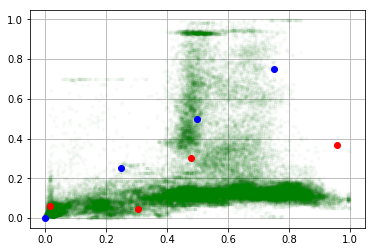

In [6]:
### K-means

# Definindo os centroides - Comecando pelo basico | chute inicial

ctrd = [[0.0,0.0],[0.25,0.25],[0.50,0.50],[0.75,0.75]]
#ctrd = [[0.0,0.6],[0.25,0.6],[0.50,0.6],[0.75,0.6]]
#ctrd = [[0.5,0.0],[0.5,0.25],[0.5,0.50],[0.5,0.75]]

#---------------------------------------------------------#

def d_xy(p1,p2): # distancia Euclideana entre dois pontos
    d = ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**(0.5)
    return(d)

def p_xy(p1,p2): # ponto intermediario entre dois pontos
    px = (p1[0] + p2[0])/2.0
    py = (p1[1] + p2[1])/2.0
    
    return[px,py]

#---------------------------------------------------------#
n = len(VSH_ND) # número de elementos totais (um monte, muita coisa mesmo)
ctrd2 = ctrd.copy() # ctrd2 é a copia de ctrd, ctrd2 vai ser "atualizado" com os dados

for j in range(n): # loop externo | numero de elementos de VSH_ND. acessa profundidade por profundidade
    
    ###################################################################
    # LOOP DENTRO DO LOOP SOCORRO!!!
    # CALMA!
    # CALMA NADA!!!
    # RELAXA, VAMOS VER AQUI DENTRO ANTES!
    # ta bom, mas para de gritar.
    # . . . 
    # tente ver o loop interno como um elemento a parte, esqueça o externo por hora;
    
    cls = [] # armazena as "classes" que sao as distancias Euclideanas
    # O k-means utiliza a distância euclideana entre os pontos para classificar
    # se a distância do ponto p1 para o centroide c1 for a menor em relação aos demais centroides
    # p1 pertence a classe c1 (que pode ser arenito, folhelho, alpaca, etc..)
    
    m = len(ctrd2) # número de centróides (4 no caso)
    for i in range(m): # loop interno
        cls.append(d_xy([VSH_ND[j],VSH_GR[j]],ctrd[i])) # armazena a distancia Euclideana para cada centroide
        # salva um vetor de distâncias euclideanas
        #print((d_xy([VSH_ND[j],VSH_GR[j]],ctrd[i])))
        
        # vamos fingir que estamos executando o cálculo dos centróides pela primeira vez
        # logo, teremos os primeiros elementos VSH_ND[0] e VSH_GR[0] pelo loop externo "j"
        # d_xy([VSH_ND[0],VSH_GR[0]],ctrd[i]) vai calcular a distância euclideana para cada centroide
        # logo, cls vai ser um vetor com 4 distâncias [d1, d2, d3 e d4]
        
    #print()
    #if j and j%1039 == 0:
        #break
        
    idx = cls.index(min(cls))  # índice do mínimo cls (idx vem de índice).
    
    # idx encontra em uma lista qual o índice do valor
    # se a lista cls é composta dos valores [1, 2, 4, 100000000000]
    # aos escrever cls.index(4) idx vai ser igual a "2", que é a posição de "4" na lista
    # já min(cls) vai indicar o valor "1", ou seja, a menor distância
    
    ctrd2[idx] = p_xy(ctrd2[idx],[VSH_ND[j],VSH_GR[j]])
    
    # logo o centróide escolhido vai ser atualizado para um novo ponto intermediário
    
    ###################################################################
    
# ao final desse loop, um novo loop se inicia
# logo, teremos os primeiros elementos VSH_ND[1] e VSH_GR[1] pelo loop externo "j"
# e depois VSH_ND[2] e VSH_GR[2] até percorrer todos os dados.
    
#---------------------------------------------------------#

ax = [] # coordenada x do centroide antigo
ay = [] # coordenada y do centroide antigo
bx = [] # coordenada x do centroide atualizado
by = [] # coordenada y do centroide atualizado

for i in range(len(ctrd2)):
    ax.append(ctrd[i][0])
    ay.append(ctrd[i][1])
    bx.append(ctrd2[i][0])
    by.append(ctrd2[i][1])
    

plt.plot(VSH_ND,VSH_GR,'g.',alpha=0.02)
plt.plot(ax,ay,'ob') # centroides antigo
plt.plot(bx,by,'or') # centroides novo
plt.grid()
plt.show()

# Parabens! voce aplicou o k-means! =D Agora teste com os outros centroides >=O

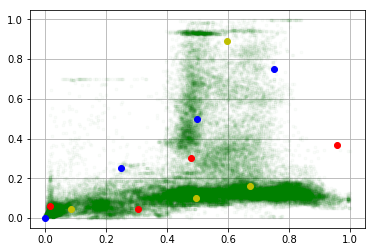

In [7]:
### Aprendizado repetitivo - acessando os dados aleatoriamente
import random # biblioteca random para acessar os dados

semente = 63 # numeros pseudo-randomicos, permite repetir o teste randômico

random.seed(semente) # define a "seed" (semente) com o valor da variável semente

##############################
# interacoes, modifique, teste e veja o que acontece aqui
interacoes = 100
##############################

ctrd3 = ctrd.copy() # Novo centroide 3
for k in range(interacoes): # Agora o loop externo e baseado nas interacoes ...
    j = random.randint(0,len(VSH_ND)-1) # ... que acessam o elemento no poco na j-esima profundidade
    
    cls = []
    for i in range(len(ctrd3)):
        cls.append(d_xy([VSH_ND[j],VSH_GR[j]],ctrd[i]))
    idx0 = cls.index(min(cls))
    ctrd3[idx0] = p_xy(ctrd3[idx0],[VSH_ND[j],VSH_GR[j]])
    
#-------------------------------------------------------------------------------------#

cx = []
cy = []
for i in range(len(ctrd3)):
    cx.append(ctrd3[i][0])
    cy.append(ctrd3[i][1])

plt.plot(VSH_ND,VSH_GR,'g.',alpha=0.02)

plt.plot(ax,ay,'ob') # centroides originais | azul
plt.plot(bx,by,'or') # centroides treinados profundidade do poco | vermelho
plt.plot(cx,cy,'oy') # centroides treinados por via aleatoria | amarelo

plt.grid()
plt.show()

In [8]:
# programa para aplicar o k-means em um espaço n-dimensional

def gss_uff_kmeans(curvas,centroides=2,interacoes=1000,semente=100):

    random.seed(semente) # define a "seed" (semente) com o valor da variável semente
    #____________________________________________#
    # manual:
    # |curvas = colocar em uma lista todas as curvas a serem utilizadas (ex.: [rhob,nphi,gr])
    # |centroides = ou colocar um numero (gera aleatoriamente) ou colocar as coordenadas em uma lista
    # |interacoes = numero de interacoes a serem realizadas para o treinamento
    # |semente = "seed" determina a aleatoriedade no sorteio dos centroides e das interacoes
    
    #____________________________________________#
    
    def gss_uff_d_euclideana(crv,pts): # distância euclideana espaço n dimensional
        d = []
        for i in range(len(crv)):
            d.append((crv[i] - pts[i])**2.0)
        return np.sqrt(sum(d))
    
    #=====================#
    
    def gss_uff_p_medio(crv,pts): # ponto medio no espaço euclideano n dimensional
        p = []
        for i in range(len(crv)):
            p.append((crv[i] + pts[i])/2.0)
            
        return p
    
    #____________________________________________#
    
    CTRD = [] # Centroides a serem modificados
    
    ## Comparacao de tipos de centroides
    if type(centroides) == type(1): ### gerar aleatoriamente os centroides
        
        for j in range (centroides): # quantidade de centroides
            I = [] # coordenadas centroides, pontual
            for i in range(len(curvas)): # len(curvas) e o numero de coordenadas
                I.append(random.uniform(np.min(curvas[i]),np.max(curvas[i])))
            CTRD.append(I)        

    if type(centroides) == type([]):### utilizar os centroides iniciados
        CTRD = centroides.copy()

    print(len(CTRD),CTRD,'\n')
    
    #____________________________________________#
    
    for l in range(interacoes): # acessa a interatividade (aleatorio)
        k = random.randint(0,len(curvas[0])-1) # k indica a posicao na profundidade
        
        classes = []
        for j in range(len(CTRD)): # n centroides

            coord,pontos = [],[]
            for i in range(len(CTRD[j])): # m coordenadas (x,y,z, etc...)
                coord.append(CTRD[j][i])
                pontos.append(curvas[i][k])

            classes.append(gss_uff_d_euclideana(coord,pontos))
 
        idx0 = classes.index(min(classes))

        CTRD[idx0] = gss_uff_p_medio(CTRD[idx0],pontos)

    return(CTRD)

4 [[0.20367044742105156, 0.09229216892882268], [0.6594800023332608, 0.5835921744339495], [0.6344092107298325, 0.3533108777255335], [0.45126484018795465, 0.8845237402258698]] 



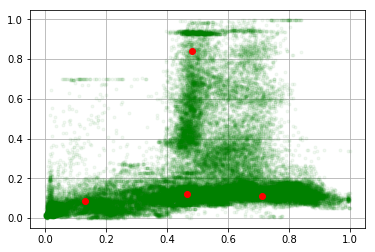

In [9]:
centro = gss_uff_kmeans([VSH_ND,VSH_GR],4,interacoes=1000,semente=90)

ax = []
ay = []
for i in range(len(centro)):
    ax.append(centro[i][0])
    ay.append(centro[i][1])

plt.plot(VSH_ND,VSH_GR,'g.',alpha=0.05)
plt.plot(ax,ay,'or')

plt.grid()
plt.show()

4 [[0.0, 0.0], [0.25, 0.25], [0.5, 0.5], [0.75, 0.75]] 



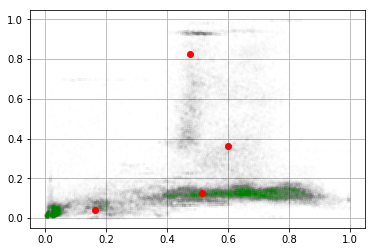

In [10]:
ctrd = [[0.0,0.0],[0.25,0.25],[0.50,0.50],[0.75,0.75]]
centro2 = gss_uff_kmeans([VSH_ND,VSH_GR],ctrd,interacoes=10000,semente=63)

bx = []
by = []
for i in range(len(centro2)):
    bx.append(centro2[i][0])
    by.append(centro2[i][1])

plt.plot(VSH_ND,VSH_GR,'g.',alpha=0.005)
plt.plot(bx,by,'or')

plt.grid()
plt.show()

In [11]:
### transformar em litologia

def gss_uff_lito(curvas,centroides):
    
    #____________________________________________#
    
    def gss_uff_d_euclideana(crv,pts): # distância euclideana espaço n dimensional
        d = []
        for i in range(len(crv)):
            d.append((crv[i] - pts[i])**2.0)
        return np.sqrt(sum(d))
    
    #____________________________________________#
    
    # enesima profundidade k
    
    lito = []
    for k in range(len(curvas[0])): # profundidade a profundidade (um monte)
        distancias = []
        for j in range(len(centroides)): # n centroides (4 no caso, ou seja 4 litologias)
            coord,ponto = [],[]
            for i in range(len(curvas)): # m curvas (2 no caso, ou seja, duas curvas)
                coord.append(centroides[j][i]) 
                ponto.append(curvas[i][k])
            distancias.append(gss_uff_d_euclideana(ponto,coord)) # distancia de cada ponto para cada centroide
        lito.append(distancias.index(min(distancias))) # classificação em cima da posição dos centroides
        
    return lito

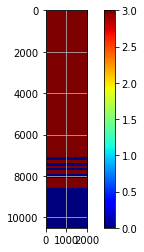

In [12]:
lito_DP1 = np.array([gss_uff_lito([data_DP1[1],data_DP1[2]],centro2)]*2000).T

plt.imshow(lito_DP1,cmap='jet')
plt.grid()
plt.colorbar()
plt.show()

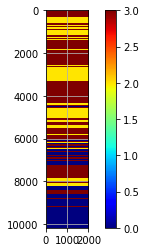

In [13]:
lito_ES1 = np.array([gss_uff_lito([data_ES1[1],data_ES1[2]],centro2)]*2000).T

plt.imshow(lito_ES1,cmap='jet')
plt.grid()
plt.colorbar()
plt.show()

classifica todos os pontos

tira a media de todos os pontos (por classe)

cria um novo conjunto de centróides

--------------------------------------------

classifica